In [34]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import numpy as np
import time


In [35]:
#setting up files that are going to be worked on 
file= Path("data/MORTGAGE30US .csv")
mortgage_rates_csv =pd.read_csv(file)

file_2 = Path("data/median_price_change.csv")
median_price_change_csv = pd.read_csv(file_2)


median_price_change_csv.head()

,observation_date,"Los Angeles, CA metro area","San Francisco, CA","San Jose, CA","Seattle, WA metro area","Austin, TX","Denver, CO","Las Vegas, NV","Portland, OR"
0,2/1/19,3%,11%,2%,5%,3%,7%,-5%,6%
1,3/1/19,3%,10%,6%,3%,5%,7%,6%,3%
2,4/1/19,1%,-1%,4%,3%,7%,6%,-6%,-3%
3,5/1/19,0%,2%,0%,1%,2%,0%,4%,8%
4,6/1/19,2%,4%,-1%,-2%,1%,-1%,2%,-4%


In [49]:
mortgage_rates_df = pd.DataFrame({"Month of Period End":mortgage_rates_csv["observation_date"],
                                  "Interest Rate": mortgage_rates_csv["MORTGAGE30US"]})
mortgage_rates_df.dropna()

#getting rates starting from 2019
mortgage_rates_df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,64,65])


,Month of Period End,Interest Rate
13,2/1/19,4.37
14,3/1/19,4.27
15,4/1/19,4.14
16,5/1/19,4.07
17,6/1/19,3.80
18,7/1/19,3.77
19,8/1/19,3.62
20,9/1/19,3.61
21,10/1/19,3.69
22,11/1/19,3.70


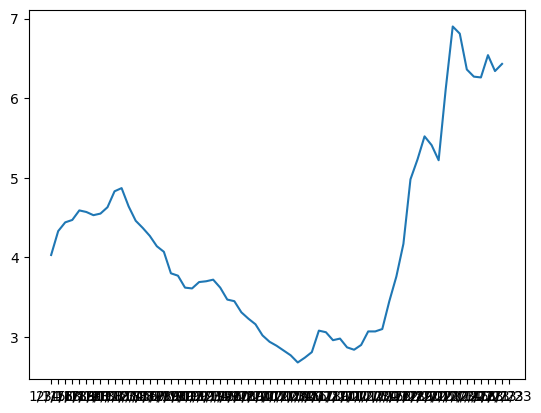

In [27]:
#Line graph representing increase in mortgage rates over time

xaxis = mortgage_rates_df["Month of Period End"]
yaxis = mortgage_rates_df["Interest Rate"]

plt.plot(xaxis,yaxis)

In [114]:
#cleaning median_price_change_csv

median_price_change_df = pd.DataFrame({"Month of Period End":median_price_change_csv["observation_date"],
                                       "Los Angeles, CA": median_price_change_csv["Los Angeles, CA metro area"],
                                       "San Francisco, CA": median_price_change_csv["San Francisco, CA"],
                                       "San Jose, CA": median_price_change_csv["San Jose, CA"],
                                       "Seattle, WA": median_price_change_csv["Seattle, WA metro area"],
                                       "Austin, TX": median_price_change_csv["Austin, TX"],
                                       "Denver, CO": median_price_change_csv["Denver, CO"],
                                       "Las Vegas, NV": median_price_change_csv["Las Vegas, NV"],
                                       "Portland, OR": median_price_change_csv["Portland, OR"]})
median_price_change_df

,Month of Period End,"Los Angeles, CA","San Francisco, CA","San Jose, CA","Seattle, WA","Austin, TX","Denver, CO","Las Vegas, NV","Portland, OR"
0,2/1/19,3%,11%,2%,5%,3%,7%,-5%,6%
1,3/1/19,3%,10%,6%,3%,5%,7%,6%,3%
2,4/1/19,1%,-1%,4%,3%,7%,6%,-6%,-3%
3,5/1/19,0%,2%,0%,1%,2%,0%,4%,8%
4,6/1/19,2%,4%,-1%,-2%,1%,-1%,2%,-4%
5,7/1/19,3%,-8%,0%,-2%,0%,0%,0%,-2%
6,8/1/19,-1%,0%,-7%,-2%,-4%,-2%,2%,2%
7,9/1/19,1%,-3%,3%,-1%,0%,-4%,1%,0%
8,10/1/19,-1%,7%,0%,3%,1%,0%,-3%,-3%
9,11/1/19,0%,-2%,-1%,-2%,-1%,-1%,0%,2%


In [115]:
#Merging data fames 
#mouse_study_complete = pd.merge(mouse_metadata,study_results, how ="outer", on = "Mouse ID")

mortgage_complete = pd.merge(mortgage_rates_df,median_price_change_df, how = "outer", on =  "Month of Period End")
mortgage_complete_df = mortgage_complete.dropna()
mortgage_complete_df


,Month of Period End,Interest Rate,"Los Angeles, CA","San Francisco, CA","San Jose, CA","Seattle, WA","Austin, TX","Denver, CO","Las Vegas, NV","Portland, OR"
13,2/1/19,4.37,3%,11%,2%,5%,3%,7%,-5%,6%
14,3/1/19,4.27,3%,10%,6%,3%,5%,7%,6%,3%
15,4/1/19,4.14,1%,-1%,4%,3%,7%,6%,-6%,-3%
16,5/1/19,4.07,0%,2%,0%,1%,2%,0%,4%,8%
17,6/1/19,3.80,2%,4%,-1%,-2%,1%,-1%,2%,-4%
18,7/1/19,3.77,3%,-8%,0%,-2%,0%,0%,0%,-2%
19,8/1/19,3.62,-1%,0%,-7%,-2%,-4%,-2%,2%,2%
20,9/1/19,3.61,1%,-3%,3%,-1%,0%,-4%,1%,0%
21,10/1/19,3.69,-1%,7%,0%,3%,1%,0%,-3%,-3%
22,11/1/19,3.70,0%,-2%,-1%,-2%,-1%,-1%,0%,2%


In [117]:
#Finding Max and Mins to see if there is correlation 
max_interest = mortgage_complete_df["Interest Rate"].max()
max_price_change_la = mortgage_complete_df["Los Angeles, CA"].max()
max_price_change_sf = mortgage_complete_df["San Francisco, CA"].max()
max_price_change_sj = mortgage_complete_df["San Jose, CA"].max()
max_price_change_sea = mortgage_complete_df["Seattle, WA"].max()
max_price_change_atx = mortgage_complete_df["Austin, TX"].max()
max_price_change_den = mortgage_complete_df["Denver, CO"].max()
max_price_change_lv = mortgage_complete_df["Las Vegas, NV"].max()
max_price_change_po = mortgage_complete_df["Portland, OR"].max()

maxes_df = pd.DataFrame({"Month of Period End":mortgage_complete_df["Month of Period End"],
                         "Max Interest":max_interest,
                         "Max Price Change LA": max_price_change_la,
                         "Max Price Change SF": max_price_change_sf,
                         "Max Price Change SJ": max_price_change_sj,
                         "Max Price Change SEA": max_price_change_sea,
                         "Max Price Change ATX ": max_price_change_atx})
                         
                     
maxes_df

,Month of Period End,Max Interest,Max Price Change LA,Max Price Change SF,Max Price Change SJ,Max Price Change SEA,Max Price Change ATX
13,2/1/19,6.9,7%,9%,9%,8%,9%
14,3/1/19,6.9,7%,9%,9%,8%,9%
15,4/1/19,6.9,7%,9%,9%,8%,9%
16,5/1/19,6.9,7%,9%,9%,8%,9%
17,6/1/19,6.9,7%,9%,9%,8%,9%
18,7/1/19,6.9,7%,9%,9%,8%,9%
19,8/1/19,6.9,7%,9%,9%,8%,9%
20,9/1/19,6.9,7%,9%,9%,8%,9%
21,10/1/19,6.9,7%,9%,9%,8%,9%
22,11/1/19,6.9,7%,9%,9%,8%,9%


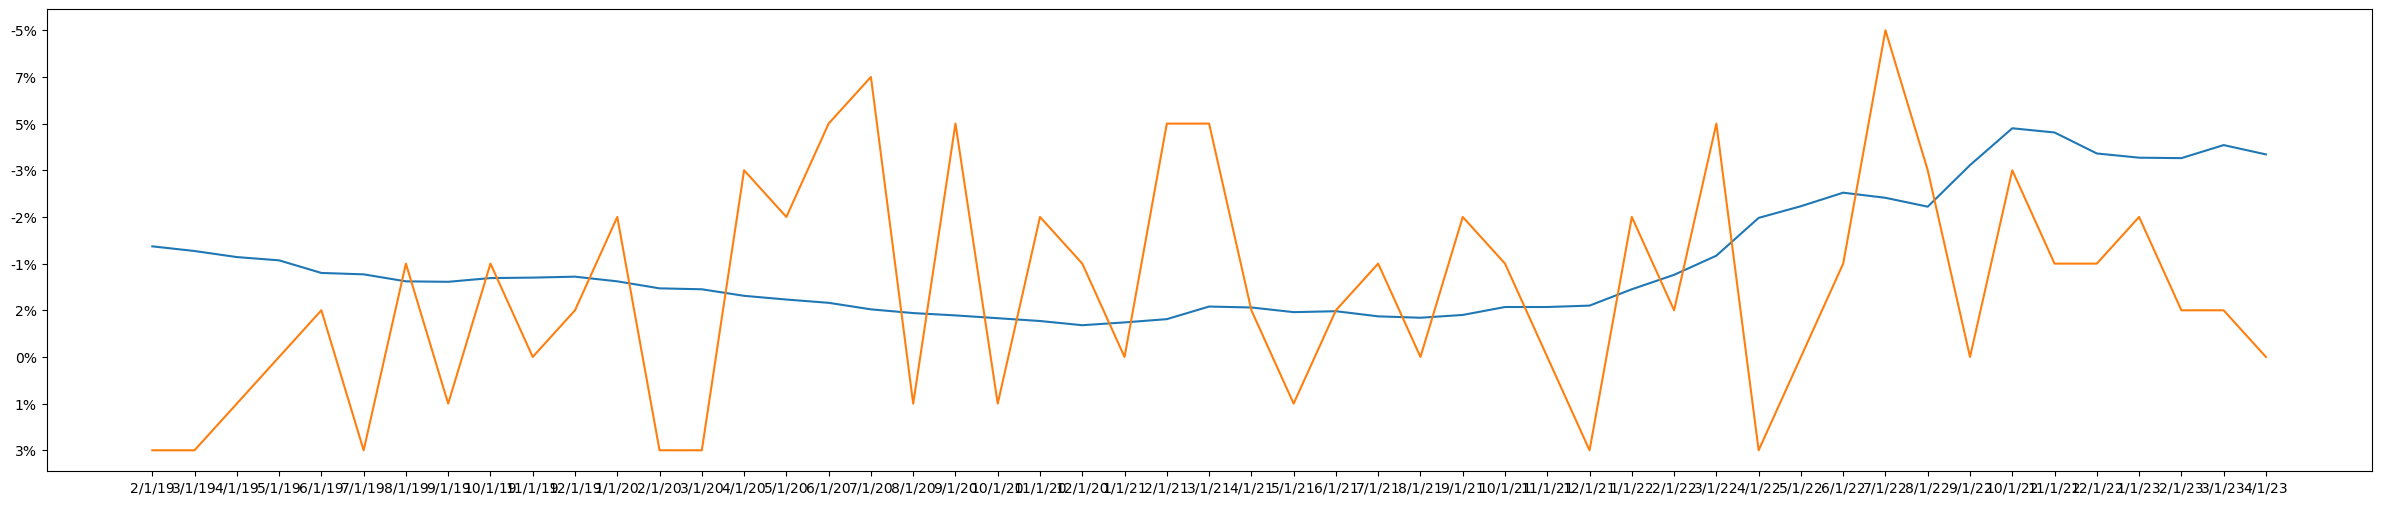

In [90]:
#plotting median_price_change_df. LA vs Interest Rates 

x_axis = mortgage_complete_df["Month of Period End"]
y_axis = mortgage_complete_df["Interest Rate"]
y_axis_2 = mortgage_complete_df["Los Angeles, CA"].astype('str')


plt.figure(figsize=(30,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

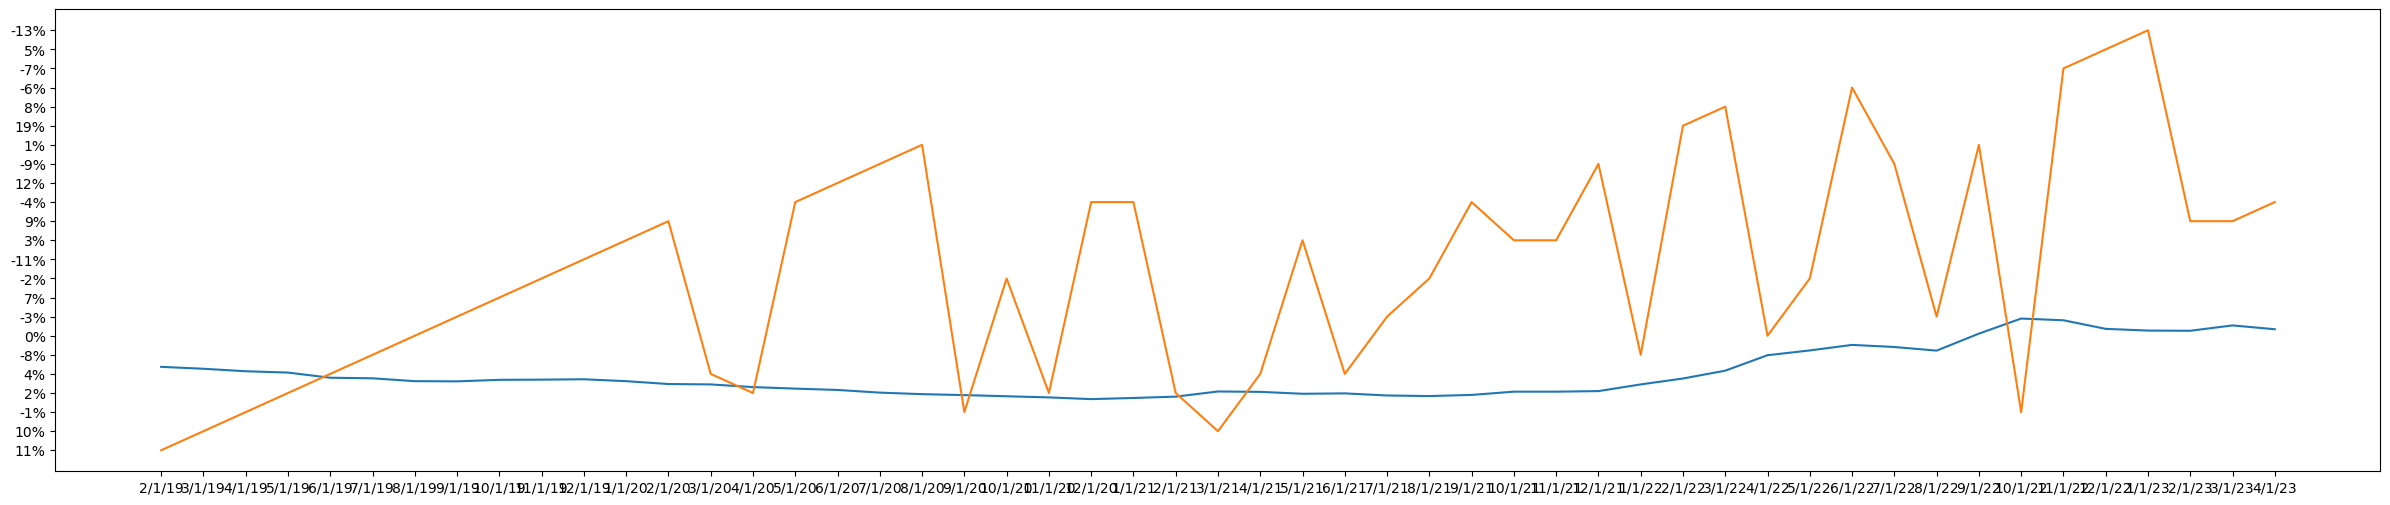

In [93]:
#SF vs Interest Rates 

x_axis = mortgage_complete_df["Month of Period End"]
y_axis = mortgage_complete_df["Interest Rate"]
y_axis_2 = mortgage_complete_df["San Francisco, CA"].astype('str')


plt.figure(figsize=(30,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

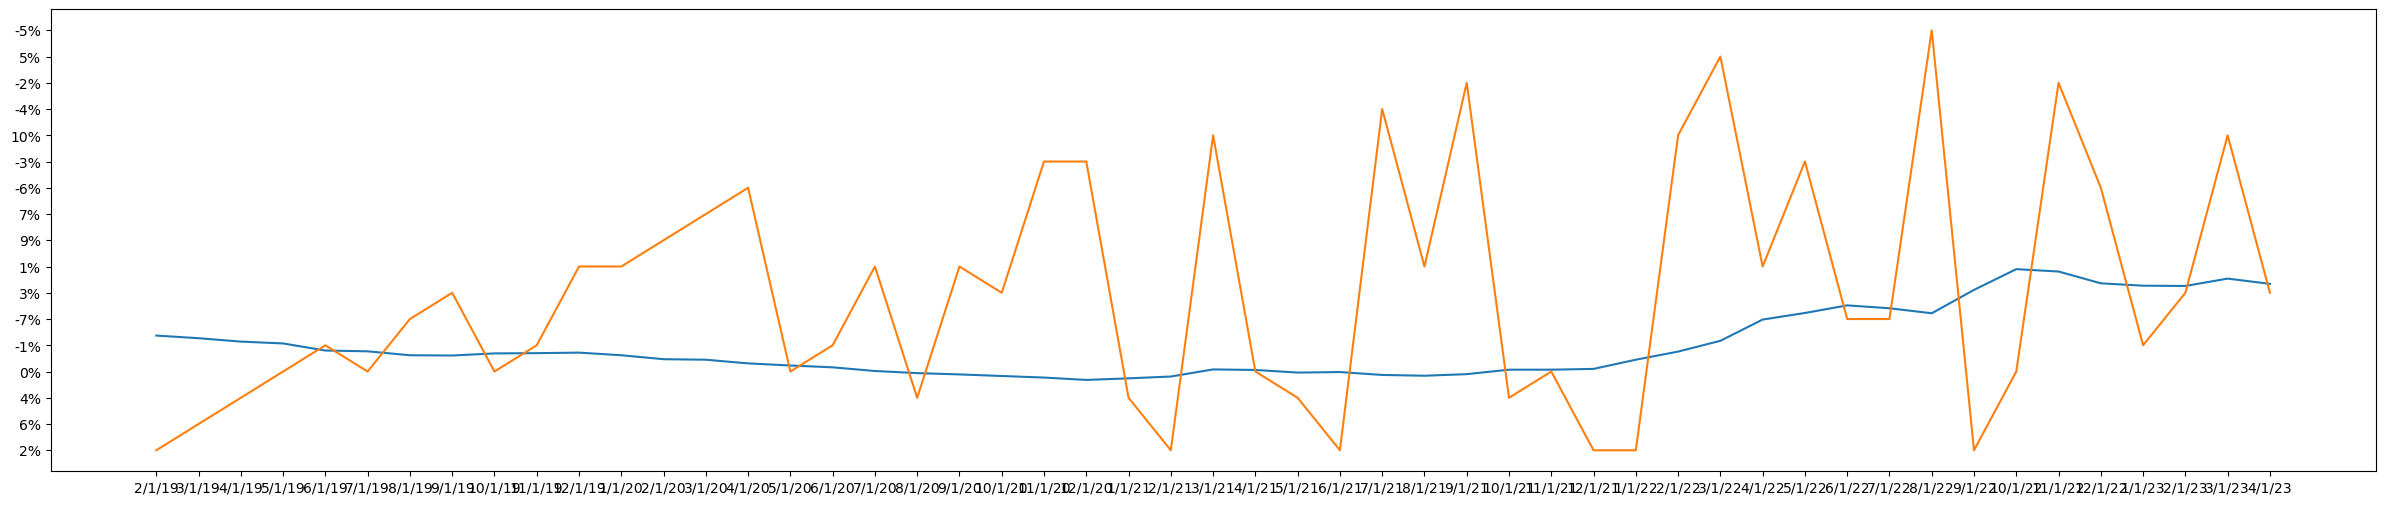

In [94]:
#San Jose, CA vs Interest Rates 

x_axis = mortgage_complete_df["Month of Period End"]
y_axis = mortgage_complete_df["Interest Rate"]
y_axis_2 = mortgage_complete_df["San Jose, CA"].astype('str')


plt.figure(figsize=(30,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

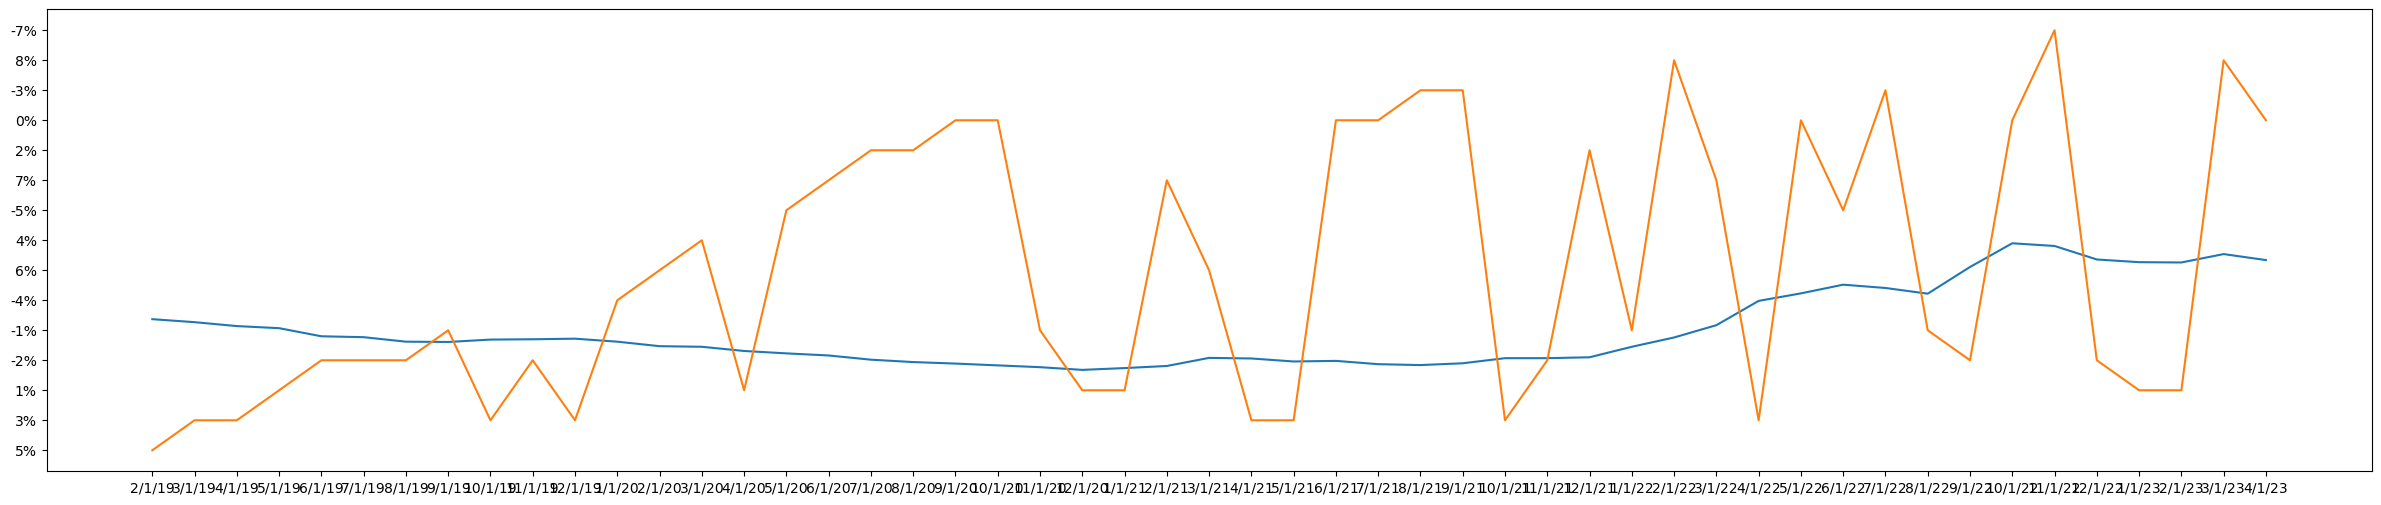

In [95]:
#Seattle, WA vs interest rates
x_axis = mortgage_complete_df["Month of Period End"]
y_axis = mortgage_complete_df["Interest Rate"]
y_axis_2 = mortgage_complete_df["Seattle, WA"].astype('str')


plt.figure(figsize=(30,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

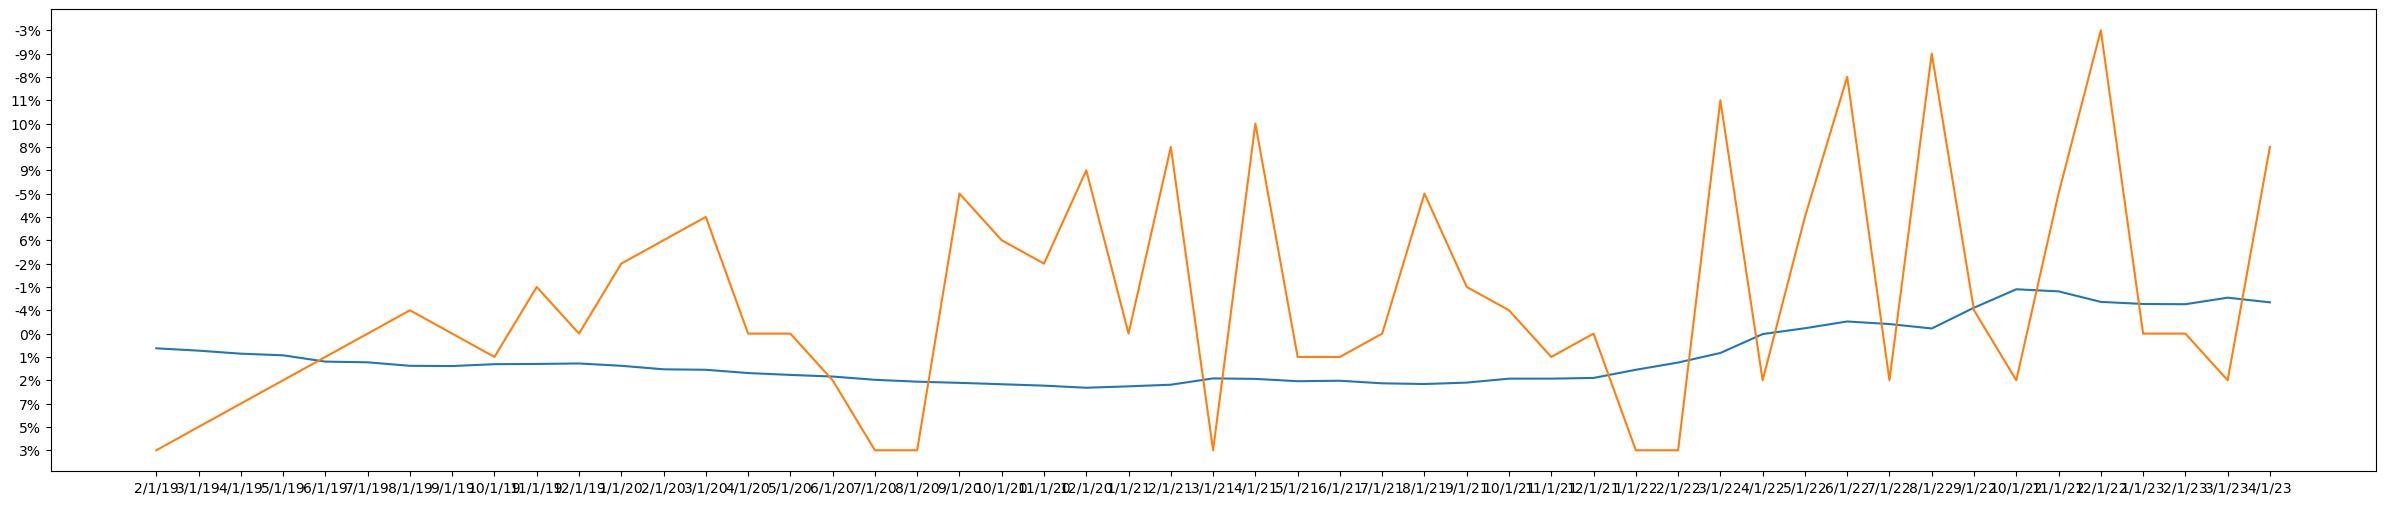

In [97]:
#Austin, TX	 vs interest rates
x_axis = mortgage_complete_df["Month of Period End"]
y_axis = mortgage_complete_df["Interest Rate"]
y_axis_2 = mortgage_complete_df["Austin, TX"].astype('str')


plt.figure(figsize=(30,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

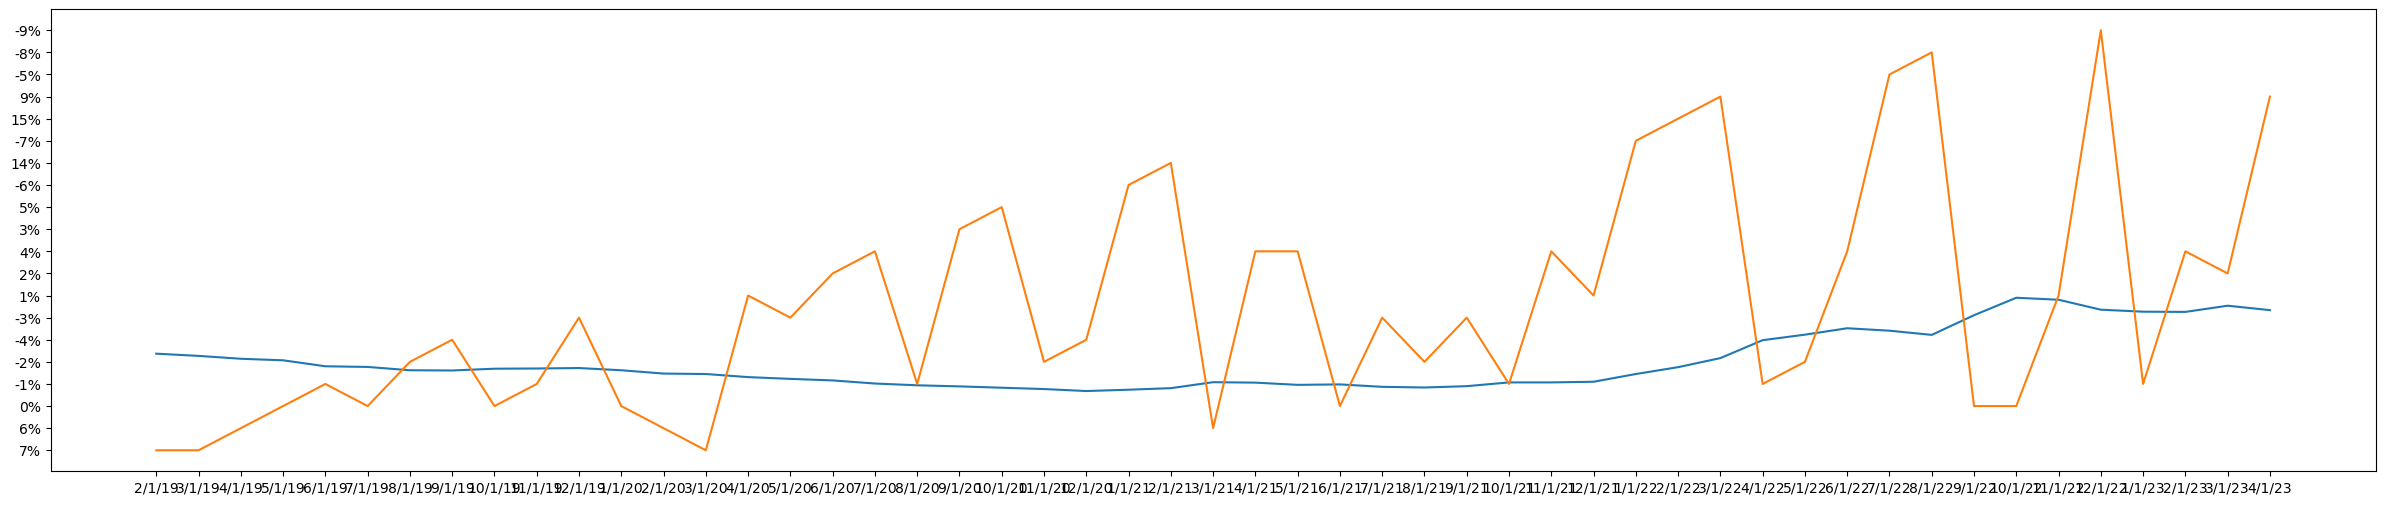

In [98]:
#Denver, CO vs interest rates
x_axis = mortgage_complete_df["Month of Period End"]
y_axis = mortgage_complete_df["Interest Rate"]
y_axis_2 = mortgage_complete_df["Denver, CO"].astype('str')


plt.figure(figsize=(30,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

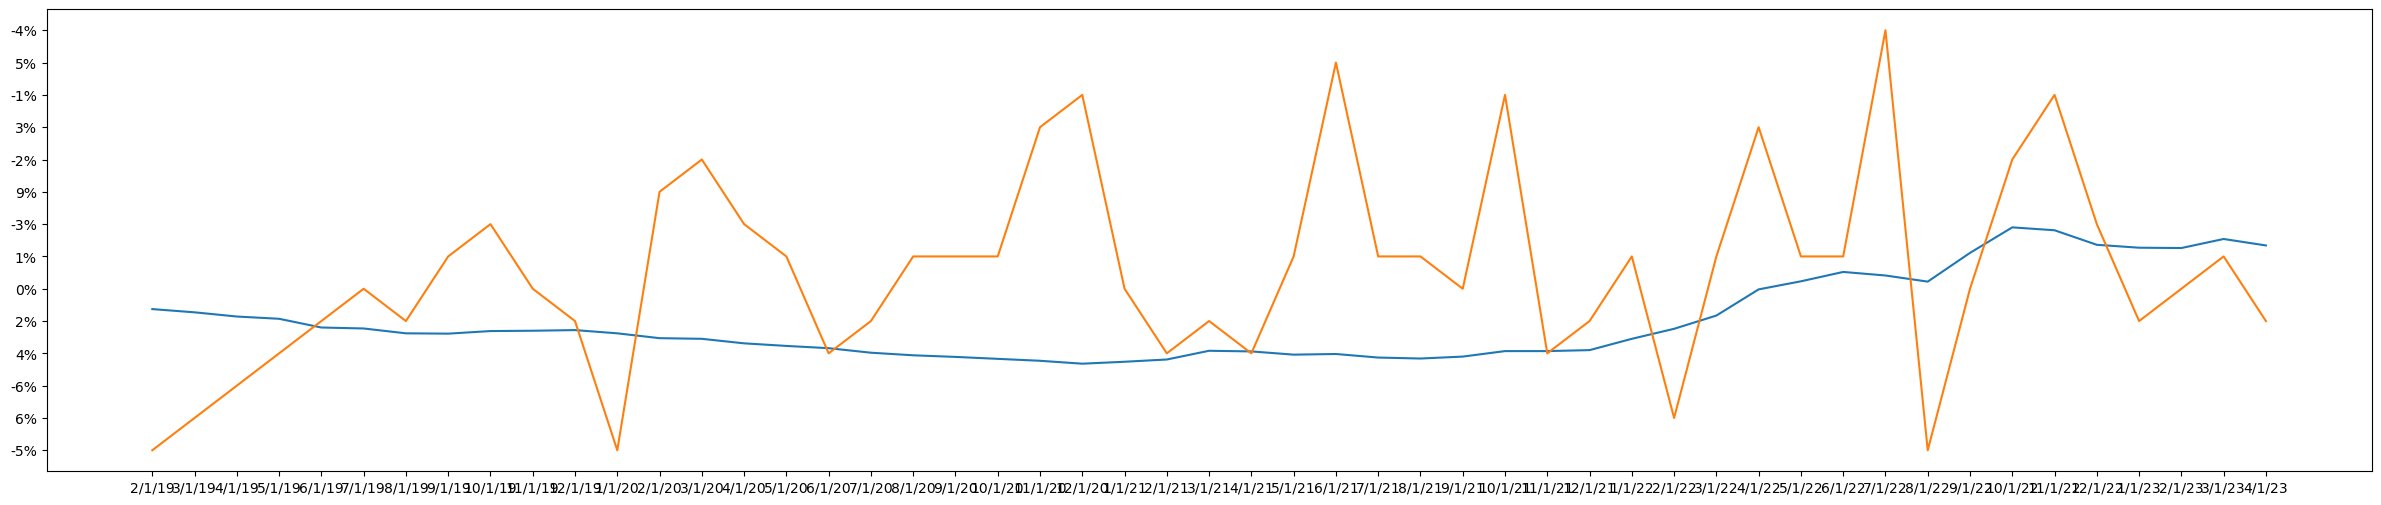

In [99]:
#Las Vegas, NV vs interest rates
x_axis = mortgage_complete_df["Month of Period End"]
y_axis = mortgage_complete_df["Interest Rate"]
y_axis_2 = mortgage_complete_df["Las Vegas, NV"].astype('str')


plt.figure(figsize=(30,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)

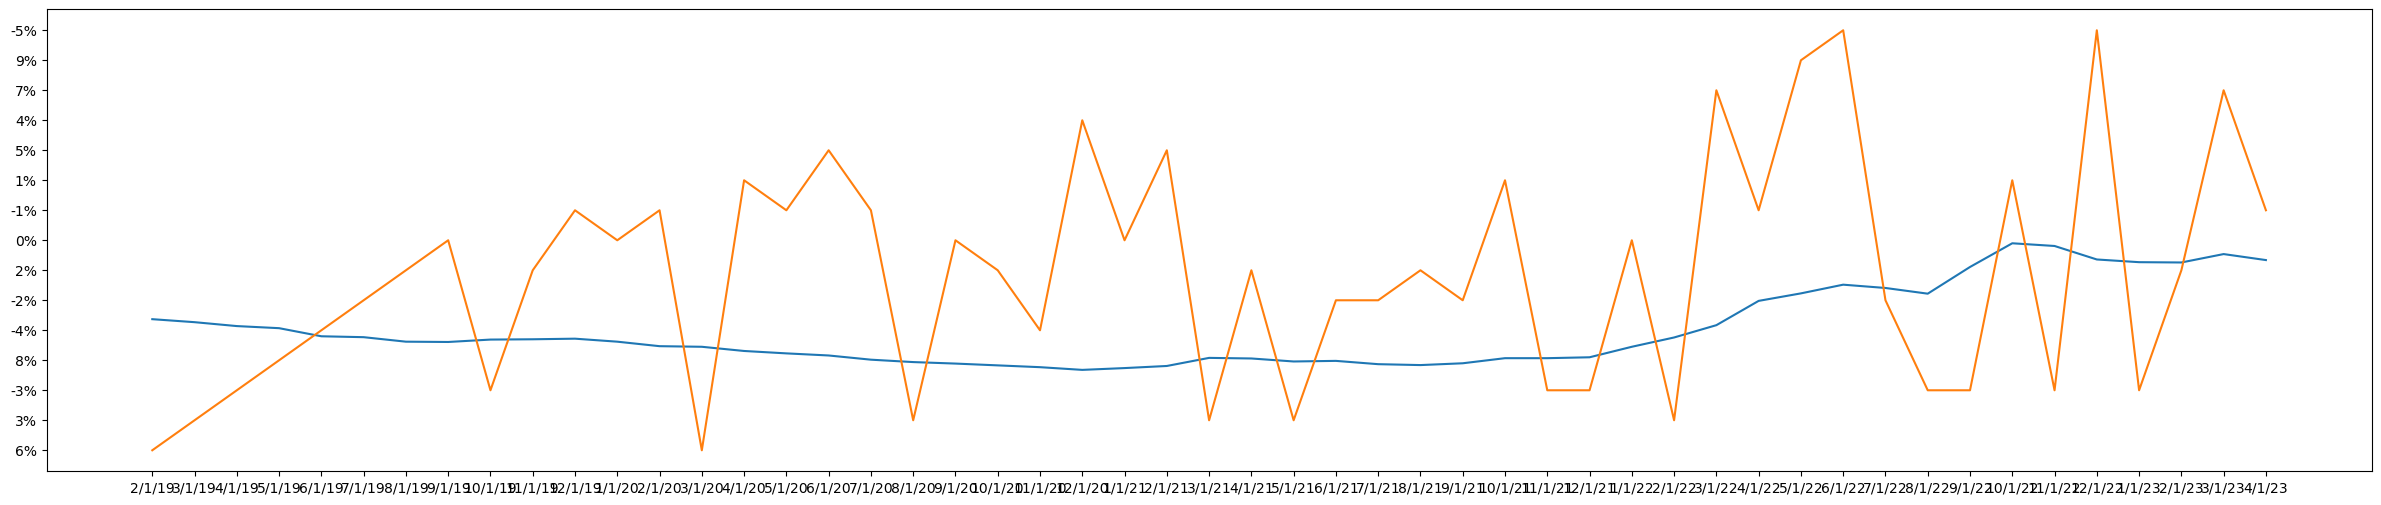

In [101]:
#Portland, OR vs interest rates
x_axis = mortgage_complete_df["Month of Period End"]
y_axis = mortgage_complete_df["Interest Rate"]
y_axis_2 = mortgage_complete_df["Portland, OR"].astype('str')


plt.figure(figsize=(30,6))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_2)